# First Approach - Fail

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html

# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

# https://machinelearningmastery.com/resample-interpolate-time-series-data-python/

In [ ]:
# Libs
!pip install control
from tools import *

import pandas as pd
import numpy as np

## Extracting info about data set

In [ ]:
import os

DATA_DIR = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files'

sample_rates = []
sample_size = []

for root_dir_path, sub_dirs, files in os.walk(DATA_DIR):
    for j in range(0, len(files)):
        if files[j] != 'desktop.ini':            
            path = root_dir_path + "/" + files[j]
            data = pd.read_csv(path)
            data.DATE = pd.to_datetime(data.DATE)
            
            sample_rates.append(data.DATE.diff().min())    
            sample_size.append(len(data.DATE))
            
            # break

In [ ]:
from statistics import median

print("Minimum size:", min(sample_size))
print("Median size:", median(sample_size))
print("Maximum size:", max(sample_size))
# print()
# print(sorted(sample_size))

Minimum size: 584
Median size: 15050
Maximum size: 25630


In [ ]:
print("Minimum size:", min(sample_rates))
print("Average size:", median(sample_rates))
print("Maximum size:", max(sample_rates))

# sample_rates

Minimum size: 0 days 00:08:31.935304
Average size: 0 days 00:08:31.958318
Maximum size: 0 days 00:08:32.036530


## Reading one time series 

In [ ]:
FILE_PATH = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0105833549_20080415T231048_20080907T224903.csv'

data = pd.read_csv(FILE_PATH)
data.DATE = pd.to_datetime(data.DATE)

time = data.DATE
flux = data.WHITEFLUX

viz.view_lightcurve(time, flux)

In [ ]:
data.set_index('DATE', inplace=True)
data.head()

,WHITEFLUX
DATE,
2008-04-16 11:17:01.652367,426155.25
2008-04-16 11:25:33.698232,426286.66
2008-04-16 11:34:05.744056,426893.88
2008-04-16 11:42:37.789881,426608.53
2008-04-16 11:51:09.835706,426326.50


Now, we have a DatetimeIndex

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24403 entries, 2008-04-16 11:17:01.652367 to 2008-09-08 10:48:46.066915
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WHITEFLUX  24403 non-null  float64
dtypes: float64(1)
memory usage: 381.3 KB


## Extracting info about the time-series

### Determinating sample rate (taxa de amostragem)

In [ ]:
# Median sample rate = 8min:32seconds:8328ms

data.index.to_series().diff().median()

Timedelta('0 days 00:08:32.008328')

### Determinating sample size (tamanho da amostra) 

In [ ]:
# We have 24403 points

data.size

24403

I want data all lightcurves have the same size. The median size of the dataset is 15050.

So, I want that my data go from 24403 points to 15050

How can I resample this ?

## Resampling the lightcurve 

3480


<AxesSubplot:xlabel='DATE'>

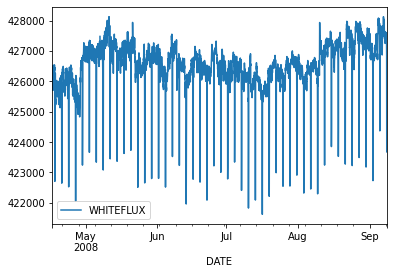

In [ ]:
downsampled_data = data.resample('H').mean()

print(downsampled_data.size)

downsampled_data.plot()

# Second Approach

[Trabalho do Marcelo](https://corot-contributions.readthedocs.io/en/latest/01%20-%20Reading%20and%20Plotting.html#Resample-time-series-data)

[Documentação scipy.signal - Resample](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html
)


In [ ]:
import pandas as pd
import os
from datetime import datetime
import shutil

!pip install control
from tools import *

## Extracting info about data set

In [3]:
# DATA_DIR = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files'
DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files'

sample_rates = []
sample_size = []

for root_dir_path, sub_dirs, files in os.walk(DATA_DIR):
    for j in range(0, len(files)):
        if files[j] != ('desktop.ini' and 'csv_files.rar'):            
            path = root_dir_path + "/" + files[j]

            data = pd.read_csv(path)
            data.DATE = pd.to_datetime(data.DATE)
            # for i in range(data.DATE.size):
            #   data.DATE[i] = datetime.strptime(data.DATE[i], '%Y-%m-%d %H:%M:%S.%f')
            
            sample_rates.append(data.DATE.diff().min())    
            sample_size.append(len(data.DATE))
            
            # break

In [4]:
from statistics import median

print("Minimum size:", min(sample_size))
print("Median size:", median(sample_size))
print("Maximum size:", max(sample_size))
print()
print(sorted(sample_size))

Minimum size: 584
Median size: 15050
Maximum size: 25630

[584, 584, 584, 584, 4097, 4097, 4097, 5356, 9228, 9734, 12930, 12930, 12930, 13062, 14100, 14101, 14102, 14725, 15050, 15051, 18840, 19345, 19346, 21548, 22168, 22169, 22169, 23947, 23951, 23952, 24403, 24403, 24404, 24404, 24404, 24456, 25630]


In [5]:
print("Minimum size:", min(sample_rates))
print("Median size:", median(sample_rates))
print("Maximum size:", max(sample_rates))

# sample_rates

Minimum size: 0 days 00:08:31.935304
Median size: 0 days 00:08:31.958318
Maximum size: 0 days 00:08:32.036530


It's notable that the sampling time doesn't vary much, so let's default all to median sample time and resampling the entire dataset

In [6]:
sample_time = median(sample_rates)
sample_size = median(sample_size)

print(f'The new sample time is {sample_time}, which will contain {sample_size} points')

The new sample time is 0 days 00:08:31.958318, which will contain 15050 points


## Resample one time series

### Reading data

In [7]:
FILE_PATH = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv'

data = pd.read_csv(FILE_PATH)

data.DATE = pd.to_datetime(data.DATE)
# for i in range(data.DATE.size):
#     data.DATE[i] = datetime.strptime(data.DATE[i], '%Y-%m-%d %H:%M:%S.%f')

time = data.DATE
flux = data.WHITEFLUX

data.head()

,DATE,WHITEFLUX
0,2007-05-16 18:10:55.071642,112626.77
1,2007-05-16 18:19:27.113766,112605.61
2,2007-05-16 18:27:59.155929,112771.50
3,2007-05-16 18:36:31.198092,113113.60
4,2007-05-16 18:45:03.240256,112621.79


In [8]:
import scipy.signal as scs
import numpy as np

flux_resampled = scs.resample(flux, sample_size)

#TODO. Resample `time`

### Check the results

In [9]:
viz.view_filter_results(time, flux, time, flux_resampled)

In [10]:
viz.view_lightcurve(time, flux_resampled)

## Resampling dataset

In [132]:
sample_size = 15050

# 4097 is the second smallest sample size

# 15050 is the median sample size

In [180]:
# Delete de folder

shutil.rmtree('/content/resampled_files')

In [181]:
DF = pd.DataFrame()

# DATA_DIR = 'C:/Users/guisa/Google Drive/01 - Iniciação Científica/02 - Datasets/csv_files'
DATA_DIR = '/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files'

sizes = []

for root_dir_path, sub_dirs, files in os.walk(DATA_DIR):
    for j in range(0, len(files)):
        if files[j] != ('desktop.ini' and 'csv_files.rar'):            
            path = root_dir_path + "/" + files[j]
            data = pd.read_csv(path)

            # If sample size is less than 584, the lightcurve will be discarded
            if (data.DATE.size != 584):
              flux = data.WHITEFLUX
              time = data.DATE
              # flux_resampled = scs.resample(flux, sample_size)

              ############################################
              time = [datetime.strptime(i, '%Y-%m-%d %H:%M:%S.%f') for i in time]

              flux_resampled, time_resampled = scs.resample(flux, sample_size, time)
              ############################################

              # Creating a new pd.DataFrame
              concat_dict = {
                  "DATE": pd.Series(time_resampled), 
                  "WHITEFLUX": pd.Series(flux_resampled)
              }
              data_resampled = pd.concat(concat_dict, axis=1)

              # Creating folder with lightcurves resampled
              RESAMPLED_DIR = 'resampled_files'
              if not os.path.isdir(RESAMPLED_DIR):
                os.mkdir(RESAMPLED_DIR)

              # Renaming lightcurve
              file_name = 'RESAMPLED_' + files[j]

              # Salving lightcurves resampled 
              FILE_DIR = file_name

              data_resampled.to_csv(file_name, index=False)
              shutil.move(FILE_DIR, RESAMPLED_DIR)

              print('Resampled and salved: ' + files[j])             
              # viz.view_filter_results(time, flux, time, flux_resampled, title=files[j])

Resampled and salved: EN2_STAR_CHR_0102708694_20071023T223035_20080303T093502.csv
Resampled and salved: EN2_STAR_CHR_0102764809_20071023T223035_20080303T093502.csv
Resampled and salved: EN2_STAR_MON_0102725122_20071023T223035_20080303T093534.csv
Resampled and salved: EN2_STAR_MON_0102671819_20071023T223035_20080303T093502.csv
Resampled and salved: EN2_STAR_CHR_0101086161_20070516T060226_20071005T074409.csv
Resampled and salved: EN2_STAR_CHR_0101206560_20070516T060226_20071005T074409.csv
Resampled and salved: EN2_STAR_CHR_0101368192_20070516T060050_20071015T062306.csv
Resampled and salved: EN2_STAR_MON_0221686194_20081011T143035_20081112T081512.csv
Resampled and salved: EN2_STAR_MON_0105118236_20100708T204534_20100924T063628.csv
Resampled and salved: EN2_STAR_MON_0100725706_20070516T060226_20071005T074409.csv
Resampled and salved: EN2_STAR_MON_0105228856_20100408T223049_20100705T044435.csv
Resampled and salved: EN2_STAR_MON_0310247220_20090403T220030_20090702T022725.csv
Resampled and sa

### See results

In [182]:
FILE = 'EN2_STAR_CHR_0315239728_20100305T001525_20100329T065610.csv'

In [183]:
df = pd.read_csv('/content/drive/MyDrive/01 - Iniciação Científica/02 - Datasets/csv_files/' + FILE)

time = df.DATE
flux = df.WHITEFLUX

viz.view_lightcurve(time, flux, title='NOT Resampled')

print(time.size)

4097


In [186]:
df_resampled = pd.read_csv('/content/resampled_files/RESAMPLED_' + FILE)

time_resampled = df_resampled.DATE
flux_resampled = df_resampled.WHITEFLUX

viz.view_lightcurve(time_resampled, flux_resampled, title='Resampled')

print(time_resampled.size)

15050


**Zipping files**

In [188]:
!zip -r /content/resampled_files.zip /content/resampled_files

  adding: content/resampled_files/ (stored 0%)
  adding: content/resampled_files/RESAMPLED_EN2_STAR_MON_0630831435_20110708T151253_20110930T044950.csv (deflated 62%)
  adding: content/resampled_files/RESAMPLED_EN2_STAR_MON_0105209106_20080415T231048_20080907T230359.csv (deflated 62%)
  adding: content/resampled_files/RESAMPLED_EN2_STAR_CHR_0102764809_20071023T223035_20080303T093502.csv (deflated 63%)
  adding: content/resampled_files/RESAMPLED_EN2_STAR_CHR_0315198039_20100305T001525_20100329T065610.csv (deflated 63%)
  adding: content/resampled_files/RESAMPLED_EN2_STAR_CHR_0102708694_20071023T223035_20080303T093502.csv (deflated 62%)
  adding: content/resampled_files/RESAMPLED_EN2_STAR_MON_0110839339_20081116T190224_20090311T103233.csv (deflated 61%)
  adding: content/resampled_files/RESAMPLED_EN2_STAR_MON_0652180928_20110708T151253_20110930T044950.csv (deflated 63%)
  adding: content/resampled_files/RESAMPLED_EN2_STAR_IMAG_0102671819_20120112T183055_20120329T093058.csv (deflated 62%)


**Download zipped folder**

In [190]:
from google.colab import files
files.download("resampled_files.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>